In [209]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import warnings
warnings.filterwarnings('ignore')

In [210]:
df=pd.read_csv('temerature_forecast.csv')
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [211]:
df.nunique()

station               25
Date                 310
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7672
LDAPS_RHmax         7664
LDAPS_Tmax_lapse    7675
LDAPS_Tmin_lapse    7675
LDAPS_WS            7675
LDAPS_LH            7675
LDAPS_CC1           7569
LDAPS_CC2           7582
LDAPS_CC3           7599
LDAPS_CC4           7524
LDAPS_PPT1          2812
LDAPS_PPT2          2510
LDAPS_PPT3          2356
LDAPS_PPT4          1918
lat                   12
lon                   25
DEM                   25
Slope                 27
Solar radiation     1575
Next_Tmax            183
Next_Tmin            157
dtype: int64

<AxesSubplot:>

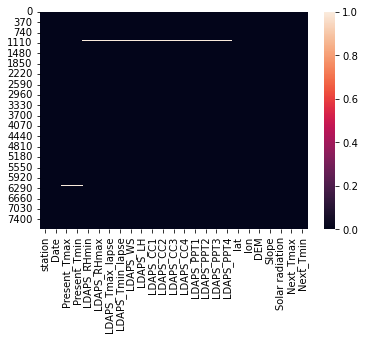

In [212]:
sns.heatmap(df.isnull())

In [213]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [214]:
df.shape

(7752, 25)

Since there's not much missing data as compared to the overall strength,dropping the rows that have ,misssing values

In [215]:

df=df.dropna()

In [216]:
df.shape

(7588, 25)

In [217]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7588 entries, 0 to 7749
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7588 non-null   float64
 1   Date              7588 non-null   object 
 2   Present_Tmax      7588 non-null   float64
 3   Present_Tmin      7588 non-null   float64
 4   LDAPS_RHmin       7588 non-null   float64
 5   LDAPS_RHmax       7588 non-null   float64
 6   LDAPS_Tmax_lapse  7588 non-null   float64
 7   LDAPS_Tmin_lapse  7588 non-null   float64
 8   LDAPS_WS          7588 non-null   float64
 9   LDAPS_LH          7588 non-null   float64
 10  LDAPS_CC1         7588 non-null   float64
 11  LDAPS_CC2         7588 non-null   float64
 12  LDAPS_CC3         7588 non-null   float64
 13  LDAPS_CC4         7588 non-null   float64
 14  LDAPS_PPT1        7588 non-null   float64
 15  LDAPS_PPT2        7588 non-null   float64
 16  LDAPS_PPT3        7588 non-null   float64


In [219]:
#converting the date column to datetime format
import datetime
df['Date']=pd.to_datetime(df['Date'])

CHECKING FOR OUTLIERS

In [220]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,...,7588.000000,7588.000000,7588.000000,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.368510,...,0.480738,0.275007,0.265373,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820
std,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,0.262260,...,1.743327,1.146087,1.179661,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.146546,...,0.000000,0.000000,0.000000,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,...,0.000000,0.000000,0.000000,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000
75%,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.574174,...,0.017735,0.007855,0.000017,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000


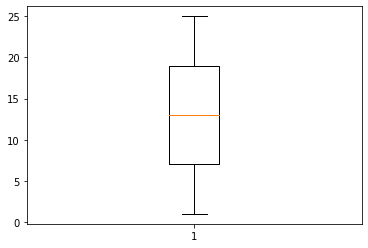

station


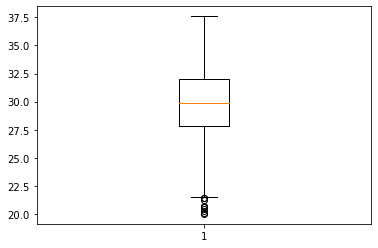

Present_Tmax


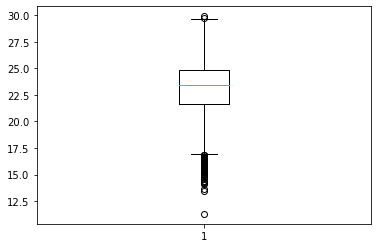

Present_Tmin


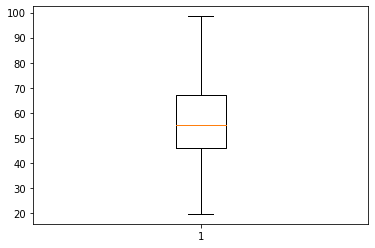

LDAPS_RHmin


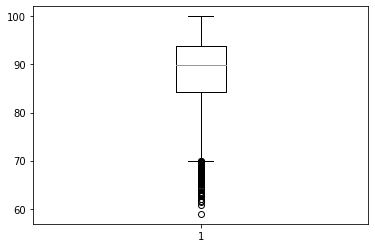

LDAPS_RHmax


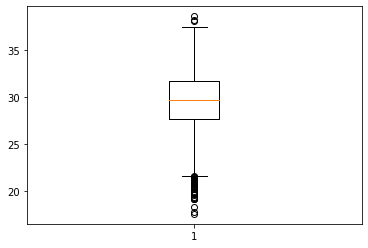

LDAPS_Tmax_lapse


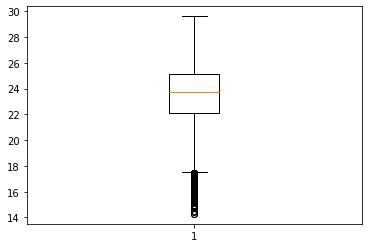

LDAPS_Tmin_lapse


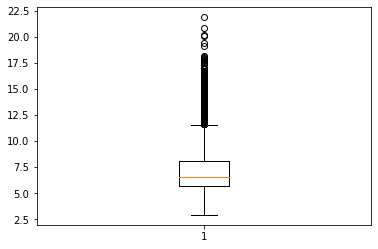

LDAPS_WS


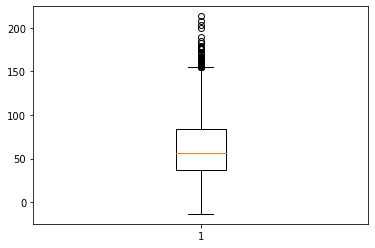

LDAPS_LH


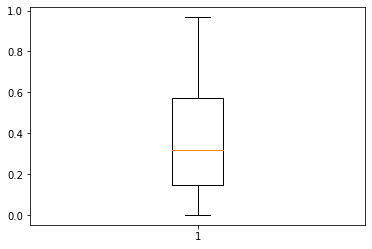

LDAPS_CC1


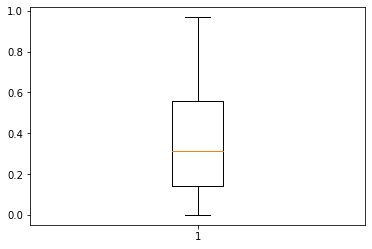

LDAPS_CC2


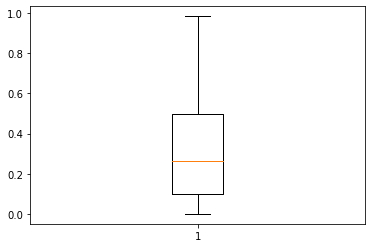

LDAPS_CC3


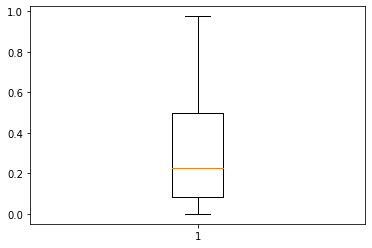

LDAPS_CC4


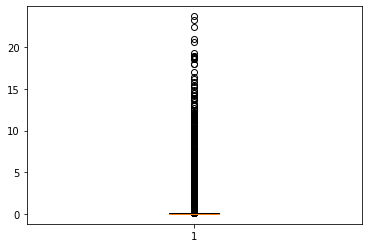

LDAPS_PPT1


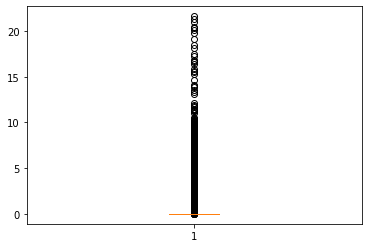

LDAPS_PPT2


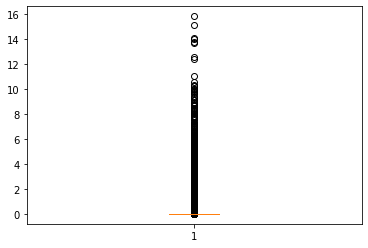

LDAPS_PPT3


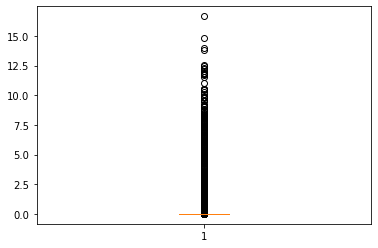

LDAPS_PPT4


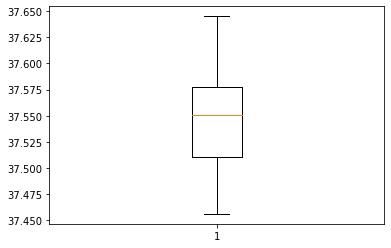

lat


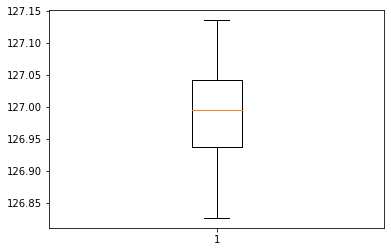

lon


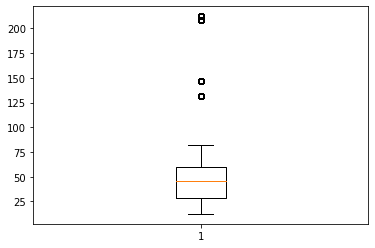

DEM


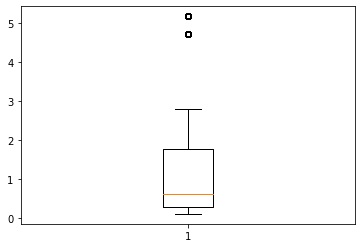

Slope


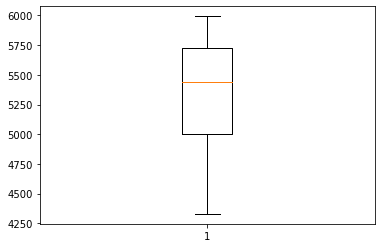

Solar radiation


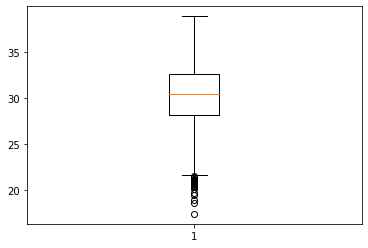

Next_Tmax


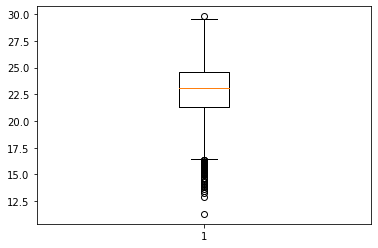

Next_Tmin


In [221]:
col=df.drop('Date',axis=1)
for i in col.columns:
    plt.boxplot(df[i])
    plt.show()
    print(i)

PRESENCE OF OUTLIERS IS APPARENT IN COLUMNS BUT IT IS WITHIN THE RANGE OF THE MEASUREMENT AS DESCRIBED IN THE ATTRIBUTE INFORMATION,HENCE DATA IS NOT UNUSUAL.

VISUALIZATION OF COLLINEARITY

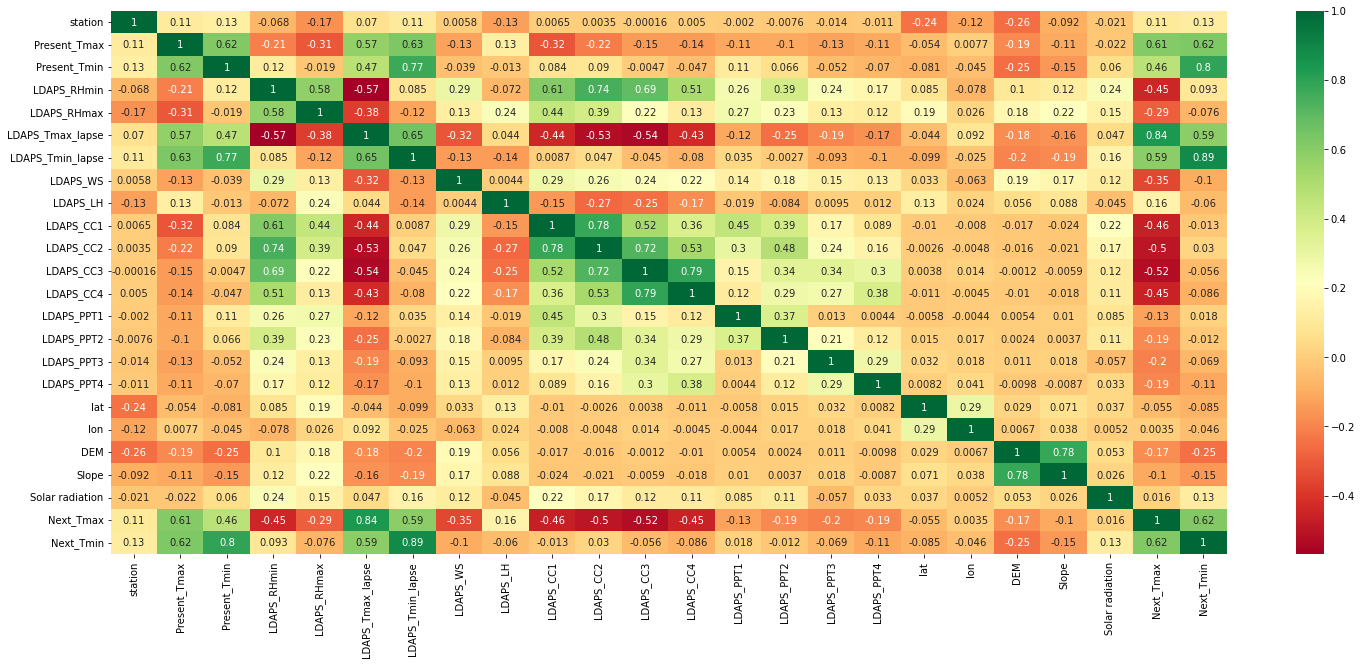

In [222]:
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')
plt.show()

CONVERTING COLUMNS HAVING GOOD CORRELATION AMONGST THEMSELVES AND PROVIDING SIMILAR INFORMATION INTO SINGLE COLUMNS KEEPING THE 'CURSE OF DIMENSIONALITY IN MIND'

In [223]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,2017-08-30,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.0,2017-08-30,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


In [224]:
df['present_range_of_temperature']=df['Present_Tmax']-df['Present_Tmin']

In [225]:
df['LADPS_RH_range']=df['LDAPS_RHmax']-df['LDAPS_RHmin']

In [226]:
#df['LADPS_TMAX_LAPSE_range']=df['LDAPS_Tmax_lapse']-df['LDAPS_Tmin_lapse']

In [227]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin',
       'present_range_of_temperature', 'LADPS_RH_range'],
      dtype='object')

In [228]:
df['LADPS_CC-_average']=(df['LDAPS_CC1']+df['LDAPS_CC2']+df['LDAPS_CC3']+df['LDAPS_CC4'])/4

DROPPING THE PARENT COLUMNS

In [229]:
drop_list=['Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4']
for i in drop_list:
    df.drop(i,axis=1,inplace=True)
df.head()

,station,Date,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,present_range_of_temperature,LADPS_RH_range,LADPS_CC-_average
0,1.0,2013-06-30,28.074101,23.006936,6.818887,69.451805,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,7.3,32.860676,0.182617
1,2.0,2013-06-30,29.850689,24.035009,5.691890,51.937448,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,10.3,38.341324,0.191113
2,3.0,2013-06-30,30.091292,24.565633,6.138224,20.573050,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,8.3,35.283108,0.203257
3,4.0,2013-06-30,29.704629,23.326177,5.650050,65.727144,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,8.6,38.243900,0.184445
4,5.0,2013-06-30,29.113934,23.486480,5.735004,107.965535,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,9.5,33.981033,0.187579


In [230]:
#separating day month and the year from the Date column
df['day']=pd.to_datetime(df['Date']).dt.day
df['month']=pd.to_datetime(df['Date']).dt.month
df['year']=pd.to_datetime(df['Date']).dt.year

df.drop('Date',axis=1,inplace=True)

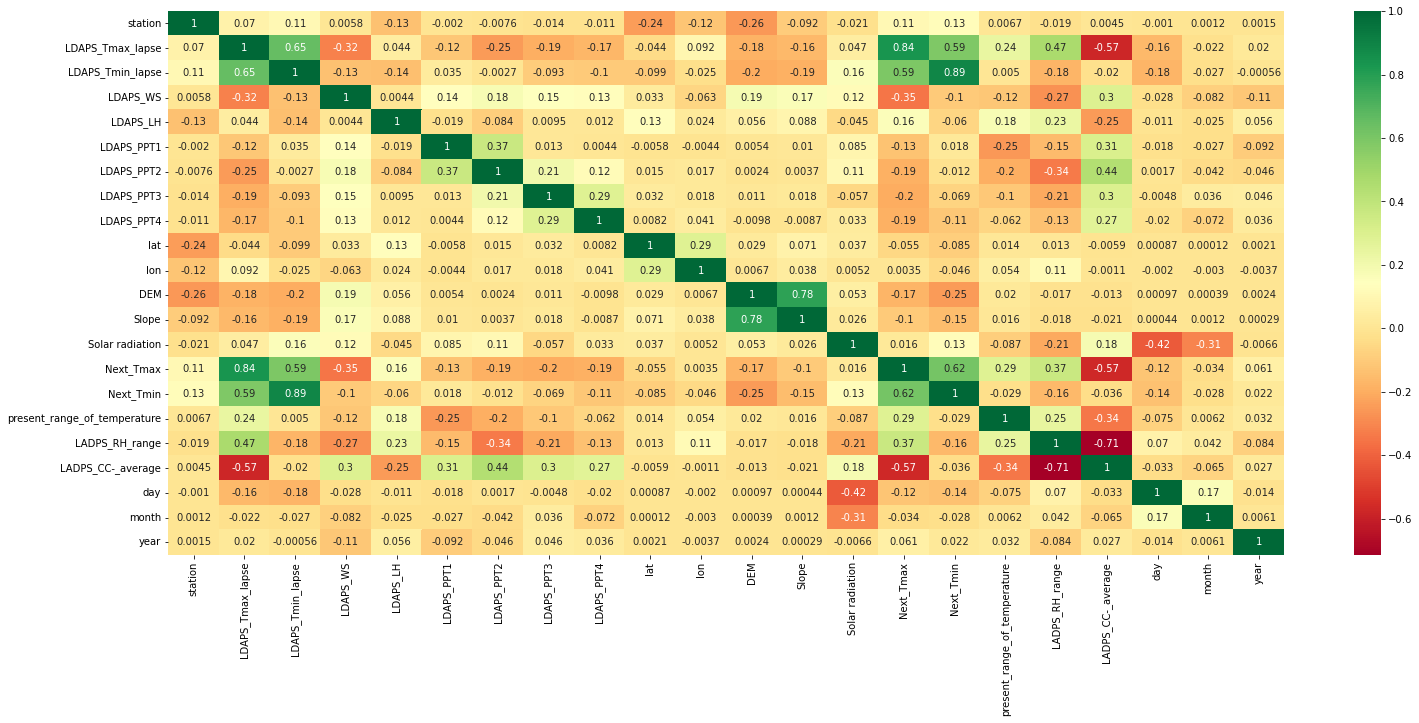

In [231]:
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')
plt.show()

Checking for skewness

In [232]:
df.skew()

station                        -0.004178
LDAPS_Tmax_lapse               -0.222349
LDAPS_Tmin_lapse               -0.574035
LDAPS_WS                        1.553926
LDAPS_LH                        0.662971
LDAPS_PPT1                      5.305906
LDAPS_PPT2                      5.710360
LDAPS_PPT3                      6.356670
LDAPS_PPT4                      6.681256
lat                             0.085377
lon                            -0.289048
DEM                             1.721617
Slope                           1.559050
Solar radiation                -0.524325
Next_Tmax                      -0.334842
Next_Tmin                      -0.393662
present_range_of_temperature    0.071057
LADPS_RH_range                  0.029464
LADPS_CC-_average               0.550277
day                             0.245563
month                          -0.703092
year                            0.013575
dtype: float64

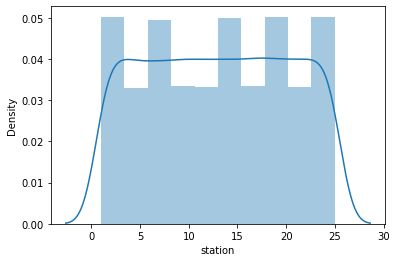

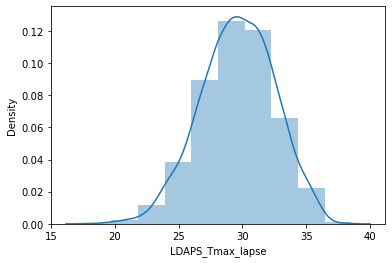

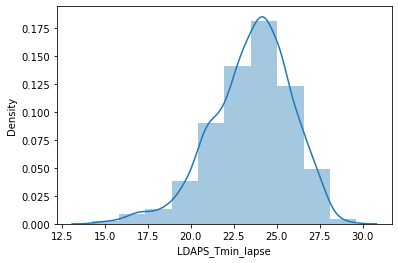

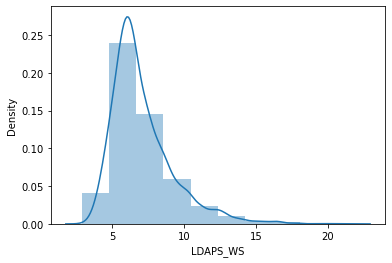

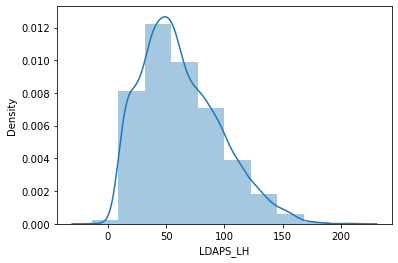

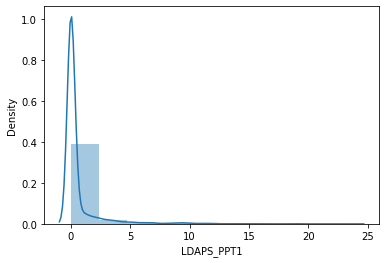

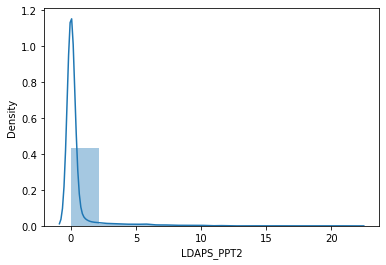

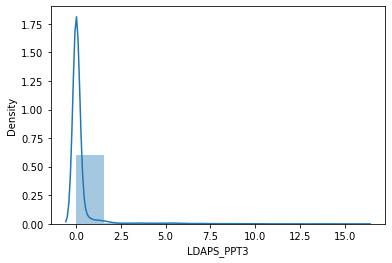

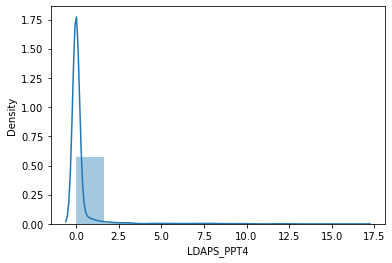

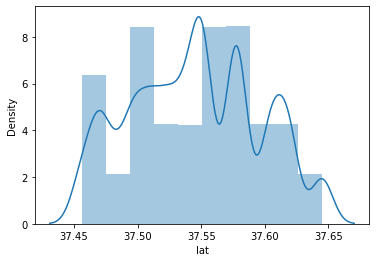

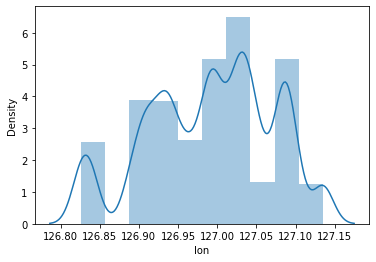

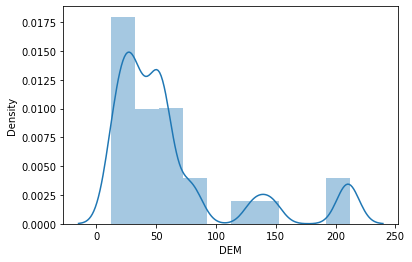

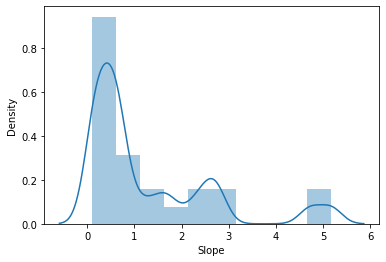

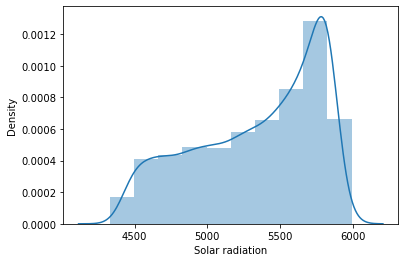

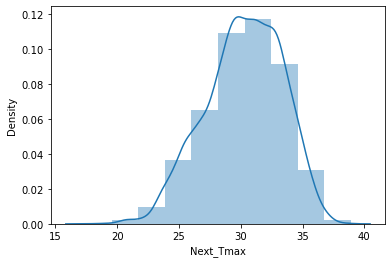

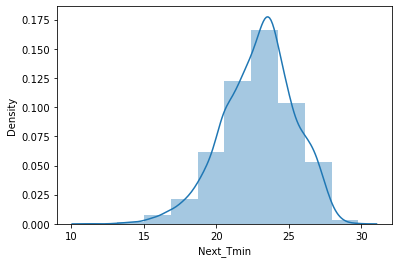

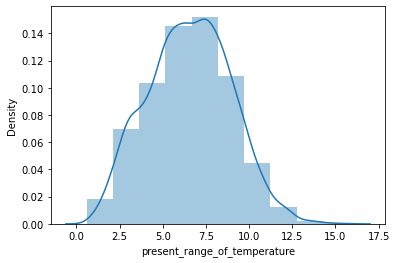

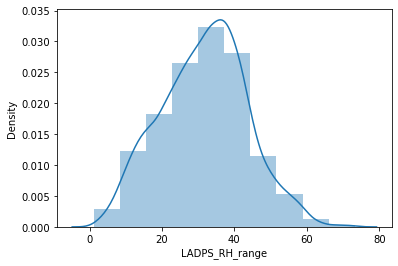

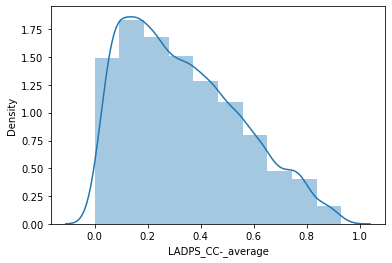

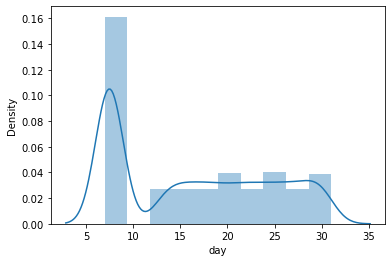

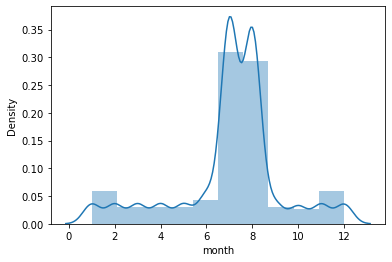

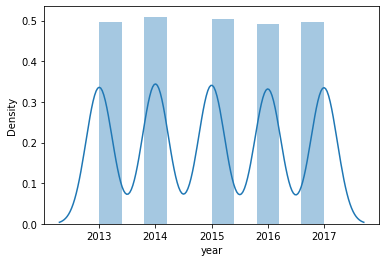

In [233]:
for i in df.columns:
    
    sns.distplot(df[i],bins=10)
    plt.show()

PRESENCE OF SKEWNESS DETECTED IN :
LDAPS_PPT1           5.305906
LDAPS_PPT2           5.710360
LDAPS_PPT3           6.356670
LDAPS_PPT4           6.681256
DEM                  1.721617
Slope                1.559050

Removing skewness

In [234]:
#using square root transformation
list_skew=['LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope']
for i in list_skew:
    df[i]=np.sqrt(df[i])
df.skew()

station                        -0.004178
LDAPS_Tmax_lapse               -0.222349
LDAPS_Tmin_lapse               -0.574035
LDAPS_WS                        1.553926
LDAPS_LH                        0.662971
LDAPS_PPT1                      2.732743
LDAPS_PPT2                      3.105387
LDAPS_PPT3                      3.644210
LDAPS_PPT4                      3.902692
lat                             0.085377
lon                            -0.289048
DEM                             1.151683
Slope                           0.869483
Solar radiation                -0.524325
Next_Tmax                      -0.334842
Next_Tmin                      -0.393662
present_range_of_temperature    0.071057
LADPS_RH_range                  0.029464
LADPS_CC-_average               0.550277
day                             0.245563
month                          -0.703092
year                            0.013575
dtype: float64

PROCEEDING TO VISUALISATION

station


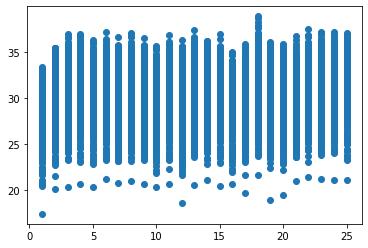

LDAPS_Tmax_lapse


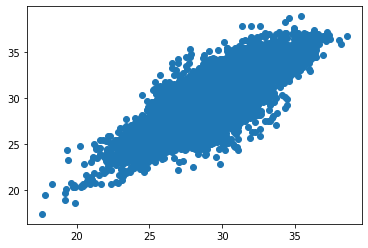

LDAPS_Tmin_lapse


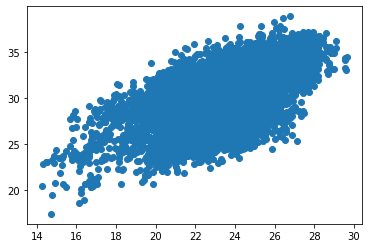

LDAPS_WS


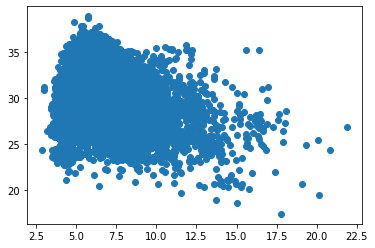

LDAPS_LH


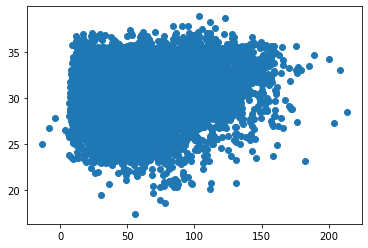

LDAPS_PPT1


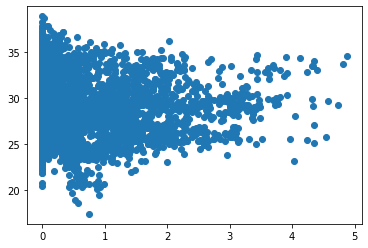

LDAPS_PPT2


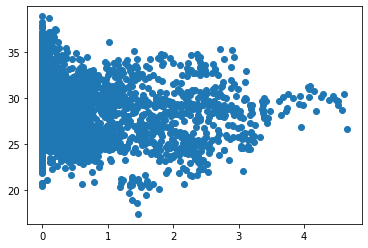

LDAPS_PPT3


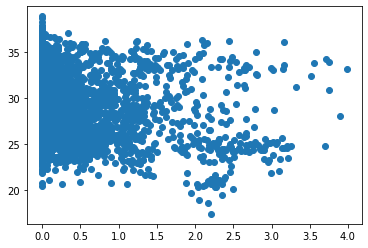

LDAPS_PPT4


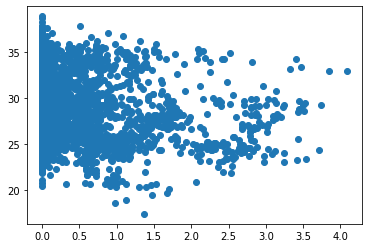

lat


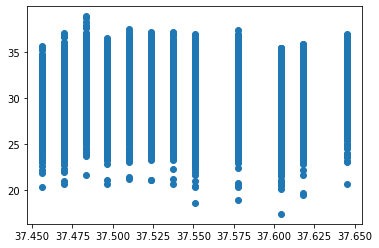

lon


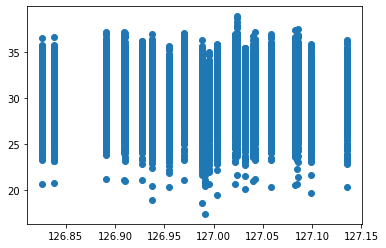

DEM


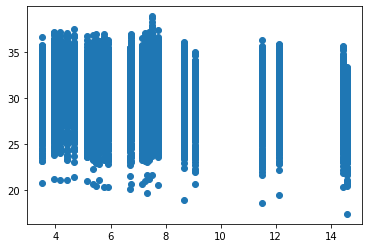

Slope


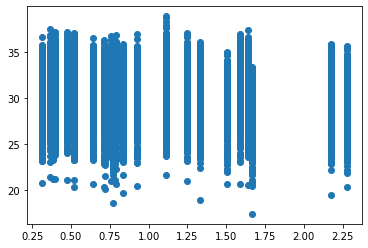

Solar radiation


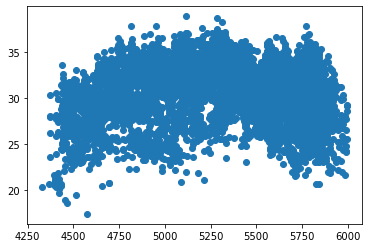

Next_Tmax


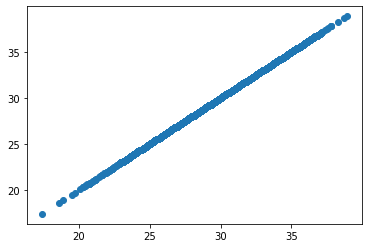

Next_Tmin


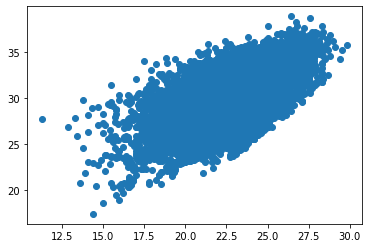

present_range_of_temperature


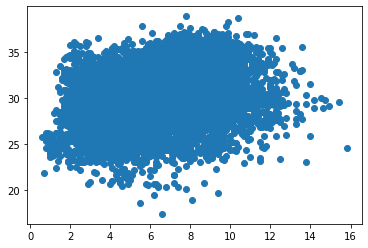

LADPS_RH_range


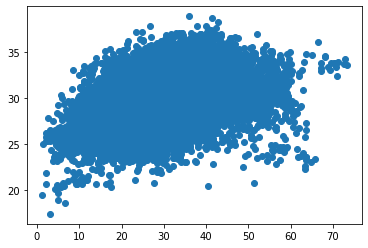

LADPS_CC-_average


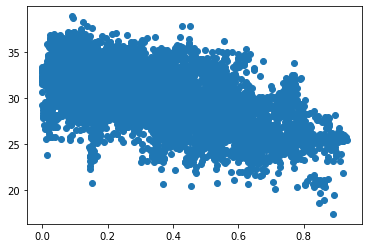

day


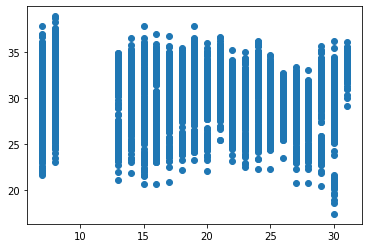

month


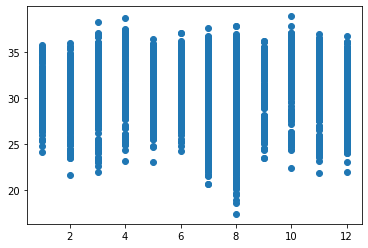

year


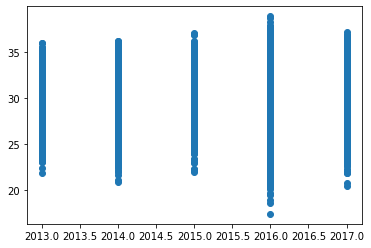

In [235]:
for i in df.columns:
    x=df[i]
    y=df['Next_Tmax']
    plt.scatter(x,y)
    print(i)
    plt.show()

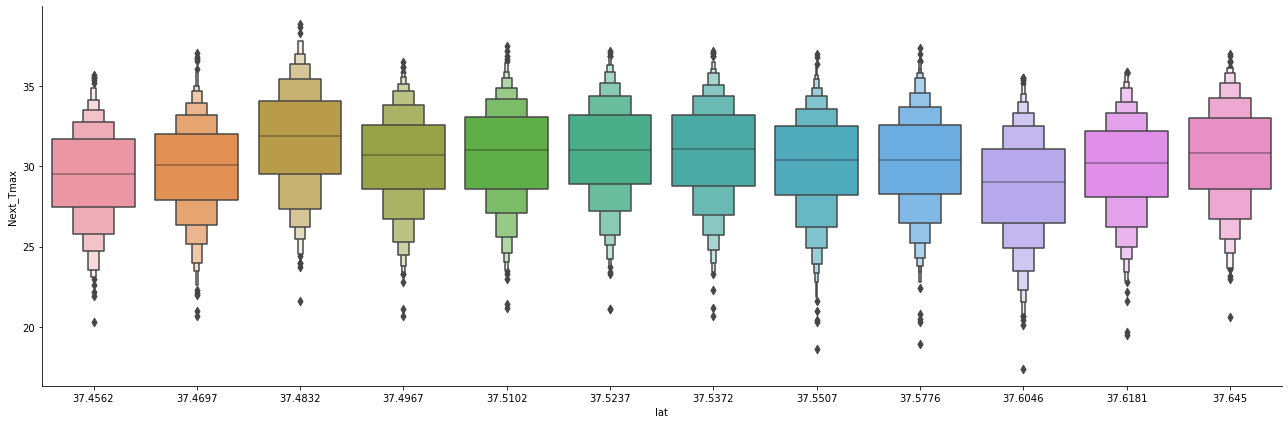

In [236]:
sns.catplot(y = "Next_Tmax", x = "lat", data = df.sort_values("lat", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()


The max temperature was slightly higher at 37.4832degrees latitude(median is higher)

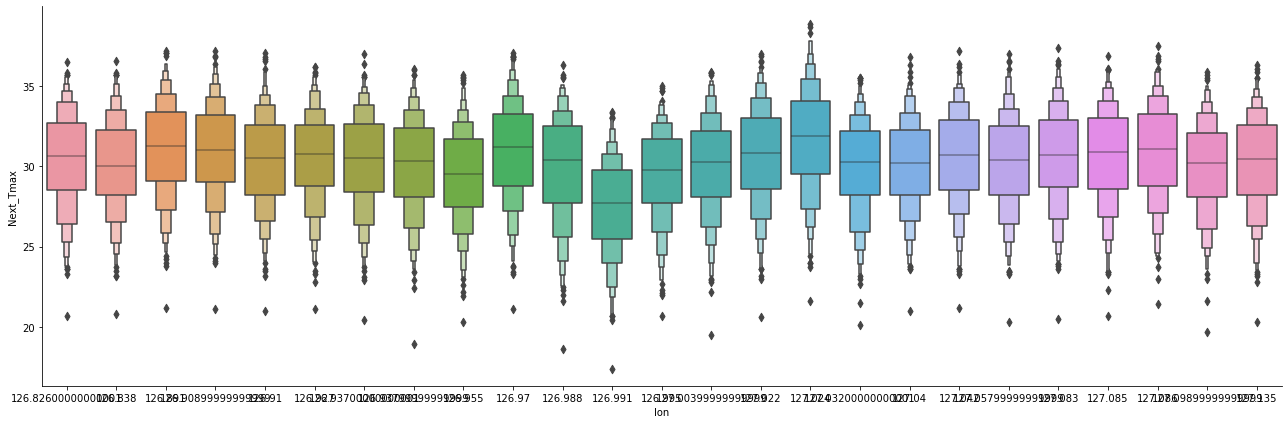

In [237]:
sns.catplot(y = "Next_Tmax", x = "lon", data = df.sort_values("lon", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()


PROCEEDING TO SCALING THE VALUES FOR MODEL SELECTION

In [238]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
sc.fit(df)
scaled=sc.transform(df)
scaled_df=pd.DataFrame(data=scaled,columns=df.columns)
scaled_df.head()

,station,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,...,Slope,Solar radiation,Next_Tmax,Next_Tmin,present_range_of_temperature,LADPS_RH_range,LADPS_CC-_average,day,month,year
0,0.000000,0.499546,0.569132,0.207447,0.365853,0.0,0.0,0.0,0.0,0.786017,...,0.690713,1.000000,0.544186,0.535135,0.440789,0.439425,0.196006,0.958333,0.454545,0.0
1,0.041667,0.584480,0.636121,0.148053,0.288703,0.0,0.0,0.0,0.0,0.786017,...,0.205514,0.925703,0.609302,0.605405,0.638158,0.515571,0.205134,0.958333,0.454545,0.0
2,0.083333,0.595982,0.670697,0.171575,0.150545,0.0,0.0,0.0,0.0,0.643008,...,0.102972,0.922242,0.637209,0.681081,0.506579,0.473081,0.218183,0.958333,0.454545,0.0
3,0.125000,0.577497,0.589934,0.145848,0.349446,0.0,0.0,0.0,0.0,1.000000,...,0.651601,0.918280,0.665116,0.702703,0.526316,0.514218,0.197970,0.958333,0.454545,0.0
4,0.166667,0.549257,0.600379,0.150325,0.535505,0.0,0.0,0.0,0.0,0.500530,...,0.202444,0.919835,0.641860,0.605405,0.585526,0.454991,0.201337,0.958333,0.454545,0.0


PROCEEDING TO MODEL TRAINING AND TESTING PHASE

In [239]:
from sklearn.model_selection import train_test_split

In [240]:
x1=df.drop('Next_Tmax',axis=1)
x=x1.drop('Next_Tmin',axis=1)
y=df['Next_Tmax']

In [241]:
x.shape

(7588, 20)

In [242]:
y.shape

(7588,)

In [243]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [244]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

LINEAR REGRESSION

In [245]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
print("score:",lr.score(x_train,y_train))
print("mean squared error:",mean_squared_error(y_test,pred_lr))
print("mean absolute error:",mean_absolute_error(y_test,pred_lr))
print("r2 score :",r2_score(y_test,pred_lr))

score: 0.7714296846056128
mean squared error: 2.097896082995866
mean absolute error: 1.1073492648966181
r2 score : 0.7792098691877823


RANDOM FOREST REGRESSOR

In [246]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=20,random_state=42)
rfr.fit(x_train,y_train)
pred_rfr=rfr.predict(x_test)
print("score : ",rfr.score(x_train,y_train))
print("mean_squared error: ",mean_squared_error(y_test,pred_rfr))
print("mean_absolute_error: ",mean_absolute_error(y_test,pred_rfr))
print("r2 score: ",r2_score(y_test,pred_rfr))

score :  0.9809312204071754
mean_squared error:  1.1062601896207587
mean_absolute_error:  0.7926327345309382
r2 score:  0.8835731979489103


DECISION TREE REGRESSOR

In [247]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
print("score : ",dtr.score(x_train,y_train))
print("mean_squared error: ",mean_squared_error(y_test,pred_dtr))
print("mean_absolute_error: ",mean_absolute_error(y_test,pred_dtr))
print("r2 score: ",r2_score(y_test,pred_dtr))


score :  1.0
mean_squared error:  2.1775688622754488
mean_absolute_error:  1.0855489021956088
r2 score:  0.7708248192790226


SUPPORT VECTOR MACHINE

In [248]:
from sklearn.svm import SVR
list=['linear','poly','rbf']
for i in list:
    
    svr=SVR(kernel=i)
    svr.fit(x_train,y_train)
    pred_svr=svr.predict(x_test)
    print("score : ",svr.score(x_train,y_train))
    print("mean_squared error: ",mean_squared_error(y_test,pred_svr))
    print("mean_absolute_error: ",mean_absolute_error(y_test,pred_svr))
    print("r2 score: ",r2_score(y_test,pred_svr))

score :  -1.8290496042189517
mean_squared error:  27.887961696658053
mean_absolute_error:  4.170346759732723
r2 score:  -1.9350294139918938
score :  0.015414030313392835
mean_squared error:  9.320015759114007
mean_absolute_error:  2.4546312585591514
r2 score:  0.019128013391325527
score :  0.02758631045259885
mean_squared error:  9.214659252222548
mean_absolute_error:  2.439666933350742
r2 score:  0.030216111189413475


USING SCALED DATA FOR KNEIGHBORS REGRESSOR

In [249]:
x1=scaled_df.drop('Next_Tmax',axis=1)
x2=x1.drop('Next_Tmin',axis=1)
y2=scaled_df['Next_Tmax']

In [250]:
x_train,x_test,y_train,y_test=train_test_split(x2,y2,test_size=.33,random_state=42)

In [251]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=2)
knr.fit(x_train,y_train)
pred_knr=knr.predict(x_test)

print("score : ",knr.score(x_train,y_train))
print("mean_squared error: ",mean_squared_error(y_test,pred_knr))
print("mean_absolute_error: ",mean_absolute_error(y_test,pred_knr))
print("r2 score: ",r2_score(y_test,pred_knr))

score :  0.9045814393299308
mean_squared error:  0.005682631492018667
mean_absolute_error:  0.05692429095297777
r2 score:  0.7235464963872946


In [252]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(n_estimators=300)
gbr.fit(x_train,y_train)
pred_gbr=gbr.predict(x_test)
print("score : ",gbr.score(x_train,y_train))
print("mean_squared error: ",mean_squared_error(y_test,pred_gbr))
print("mean_absolute_error: ",mean_absolute_error(y_test,pred_gbr))
print("r2 score: ",r2_score(y_test,pred_gbr))

score :  0.9288160624942448
mean_squared error:  0.0020656158753670833
mean_absolute_error:  0.03483618831723724
r2 score:  0.8995101571049788


In [253]:
from sklearn.ensemble import AdaBoostRegressor
abc=AdaBoostRegressor(n_estimators=100)
abc.fit(x_train,y_train)
pred_abc=abc.predict(x_test)
print("score : ",abc.score(x_train,y_train))
print("mean_squared error: ",mean_squared_error(y_test,pred_abc))
print("mean_absolute_error: ",mean_absolute_error(y_test,pred_abc))
print("r2 score: ",r2_score(y_test,pred_abc))

score :  0.7890009382022174
mean_squared error:  0.004608331719554245
mean_absolute_error:  0.054668275738466304
r2 score:  0.7758099480021412


In [254]:
estimator=[]
estimator.append(('dtr',dtr))
estimator.append(('rfr',rfr))
estimator.append(('gbr',gbr))
estimator

[('dtr', DecisionTreeRegressor()),
 ('rfr', RandomForestRegressor(n_estimators=20, random_state=42)),
 ('gbr', GradientBoostingRegressor(n_estimators=300))]

In [255]:
from sklearn.ensemble import VotingRegressor
vot_hard=VotingRegressor(estimators=estimator)
vot_hard.fit(x_train,y_train)
pred_vot_hard=vot_hard.predict(x_test)
print("score : ",vot_hard.score(x_train,y_train))
print("mean_squared error: ",mean_squared_error(y_test,pred_vot_hard))
print("mean_absolute_error: ",mean_absolute_error(y_test,pred_vot_hard))
print("r2 score: ",r2_score(y_test,pred_vot_hard))

score :  0.9841349914637211
mean_squared error:  0.00222153963236698
mean_absolute_error:  0.035643110559607
r2 score:  0.891924645185084


USING CROSS VALIDATION TO DETERMINE THE BEST PERFORMING MODEL

In [256]:
from sklearn.model_selection import cross_val_score
cv_1=cross_val_score(gbr,x,y,cv=5)
print("mean score:",cv_1.mean())
print("cross val score:",cv_1)

mean score: 0.6938916981691217
cross val score: [0.69068362 0.66703967 0.6545337  0.80342365 0.65377784]


In [257]:
from sklearn.model_selection import cross_val_score
cv_1=cross_val_score(abc,x,y,cv=5)
print("mean score:",cv_1.mean())
print("cross val score:",cv_1)

mean score: 0.6635739019025999
cross val score: [0.67328568 0.61838108 0.62807451 0.73827337 0.65985488]


In [258]:
from sklearn.model_selection import cross_val_score
cv_1=cross_val_score(vot_hard,x,y,cv=5)
print("mean score:",cv_1.mean())
print("cross val score:",cv_1)

mean score: 0.6752465289257351
cross val score: [0.67153637 0.65319972 0.6166807  0.78329467 0.65152118]


In [259]:
from sklearn.model_selection import cross_val_score
cv_1=cross_val_score(abc,x,y,cv=5)
print("mean score:",cv_1.mean())
print("cross val score:",cv_1)

mean score: 0.6607161094916346
cross val score: [0.65992826 0.61072025 0.62367277 0.75479547 0.6544638 ]


In [260]:
from sklearn.model_selection import cross_val_score
cv_1=cross_val_score(lr,x,y,cv=5)
print("mean score:",cv_1.mean())
print("cross val score:",cv_1)

mean score: 0.6961016764108447
cross val score: [0.69306176 0.65930071 0.68802847 0.80992582 0.63019162]


In [261]:
cv_1=cross_val_score(dtr,x,y,cv=5)
print("mean score:",cv_1.mean())
print("cross val score:",cv_1)

mean score: 0.441825433353753
cross val score: [0.37663139 0.41127685 0.34782459 0.58227784 0.4911165 ]


In [262]:
cv_3=cross_val_score(rfr,x,y,cv=5)
print("mean score:",cv_3.mean())
print("cross val score:",cv_3)

mean score: 0.6763667566646715
cross val score: [0.66765003 0.64094088 0.63865725 0.78333432 0.6512513 ]


In [263]:
cv_4=cross_val_score(svr,x,y,cv=5)
print("mean score:",cv_4.mean())
print("cross val score:",cv_4)

mean score: -0.08064396362070729
cross val score: [-0.08333765 -0.24503989  0.03903379 -0.04540942 -0.06846665]


In [264]:
cv_5=cross_val_score(knr,x,y,cv=5)
print("mean score:",cv_5.mean())
print("cross val score:",cv_5)

mean score: 0.021496393076946375
cross val score: [ 0.14059819 -0.31271792 -0.07962405  0.28919299  0.07003276]


In [265]:
from sklearn.linear_model import Lasso,Ridge

In [266]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [267]:
ls=Lasso(alpha=0.001)
ls.fit(x_train,y_train)
pred_ls=ls.predict(x_test)
print("score : ",ls.score(x_train,y_train))
print("mean_squared error: ",mean_squared_error(y_test,pred_ls))
print("mean_absolute_error: ",mean_absolute_error(y_test,pred_ls))
print("r2 score: ",r2_score(y_test,pred_ls))


score :  0.7713691418518563
mean_squared error:  2.0962313916678914
mean_absolute_error:  1.1066572299539663
r2 score:  0.7793850672917517


In [268]:
cv_6=cross_val_score(ls,x,y,cv=5)
print("mean score:",cv_6.mean())
print("cross val score:",cv_6)

mean score: 0.6964453213910351
cross val score: [0.69421439 0.65929821 0.68829842 0.81067034 0.62974525]


In [ ]:
a=pred_rfr
b=y_test
plt.scatter(a,b)

In [ ]:
a=pred_ls
b=y_test
plt.scatter(a,b)

THE GradientBoosting REGRESSOR AND LASSO APPEARS TO HAVE PREDICTED THE TEST DATA WELL

PROCEEDING TO HYPER-PARAMETER TUNING

In [269]:
from sklearn.model_selection import GridSearchCV
model=GradientBoostingRegressor()
parameters={'n_estimators':[50,100,150,200,250,300],'random_state':[42]}
grid=GridSearchCV(estimator=model,param_grid=parameters,cv=5)
print(grid)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'n_estimators': [50, 100, 150, 200, 250, 300],
                         'random_state': [42]})


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'n_estimators': [50, 100, 150, 200, 250, 300],
                         'random_state': [42]})

In [270]:
print(grid.best_score_)
print(grid.best_estimator_.n_estimators)
print(grid.best_params_)


0.8936167465988769
300
{'n_estimators': 300, 'random_state': 42}


PROCEEDING TO TUNING THE MODEL AS PER THE GRID SEARCH RESULTS

In [271]:
gbr=GradientBoostingRegressor(n_estimators=300,random_state=42)
gbr.fit(x_train,y_train)
pred_gbr=gbr.predict(x_test)
print("score : ",gbr.score(x_train,y_train))
print("mean_squared error: ",mean_squared_error(y_test,pred_gbr))
print("mean_absolute_error: ",mean_absolute_error(y_test,pred_gbr))
print("r2 score: ",r2_score(y_test,pred_gbr))

score :  0.9288160624942446
mean_squared error:  0.9566542306189432
mean_absolute_error:  0.749579365287552
r2 score:  0.8993182672714709


PROCEEDING TO SAVING THE MODEL

In [272]:
import pickle
filename2='temperature_forecast(next_tmax).sav'
pickle.dump(gbr,open(filename2,'wb'))

LOADING THE MODEL BACK FOR TESTING

In [273]:
load_model2=pickle.load(open(filename2,'rb'))
result=load_model2.score(x_train,y_train)
result

0.9288160624942446

In [297]:
#predicting a few rows 
test_max=load_model2.predict(x_test[10:20])
print('actual:',y_test[10:20])
print('predicted',test_max)

actual: 7416    21.3
2540    20.9
6381    24.5
5515    24.0
3329    22.2
7381    22.0
5227    26.5
1412    23.3
3664    24.3
6945    24.8
Name: Next_Tmin, dtype: float64
predicted [29.08304624 30.32231638 26.72722266 34.38335978 33.30032231 29.82040169
 30.5332216  32.52909121 31.11975673 30.90003112]


NOW PROCEEDING TO PREDICTING THE 'Next_Tmin' dependent variable

In [274]:
y=df['Next_Tmin']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [275]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
print("score:",lr.score(x_train,y_train))
print("mean squared error:",mean_squared_error(y_test,pred_lr))
print("mean absolute error:",mean_absolute_error(y_test,pred_lr))
print("r2 score :",r2_score(y_test,pred_lr))

score: 0.8133966906510922
mean squared error: 1.113904137909521
mean absolute error: 0.8219434235696642
r2 score : 0.8141634159652356


In [276]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=100,random_state=42)
rfr.fit(x_train,y_train)
pred_rfr=rfr.predict(x_test)
print("score : ",rfr.score(x_train,y_train))
print("mean_squared error: ",mean_squared_error(y_test,pred_rfr))
print("mean_absolute_error: ",mean_absolute_error(y_test,pred_rfr))
print("r2 score: ",r2_score(y_test,pred_rfr))

score :  0.9841414004289452
mean_squared error:  0.6443015904191617
mean_absolute_error:  0.6135489021956089
r2 score:  0.8925088770418154


In [277]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=10)
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
print("score : ",dtr.score(x_train,y_train))
print("mean_squared error: ",mean_squared_error(y_test,pred_dtr))
print("mean_absolute_error: ",mean_absolute_error(y_test,pred_dtr))
print("r2 score: ",r2_score(y_test,pred_dtr))


score :  0.9256098327151805
mean_squared error:  1.186874503272632
mean_absolute_error:  0.830861766310101
r2 score:  0.8019895107131205


In [278]:
from sklearn.ensemble import AdaBoostRegressor
abc=AdaBoostRegressor(n_estimators=100)
abc.fit(x_train,y_train)
pred_abc=abc.predict(x_test)
print("score : ",abc.score(x_train,y_train))
print("mean_squared error: ",mean_squared_error(y_test,pred_abc))
print("mean_absolute_error: ",mean_absolute_error(y_test,pred_abc))
print("r2 score: ",r2_score(y_test,pred_abc))

score :  0.8226313191665069
mean_squared error:  1.1588269458034708
mean_absolute_error:  0.8641464964581211
r2 score:  0.806668784353642


In [279]:
from sklearn.ensemble import GradientBoostingRegressor

In [280]:
gbr=GradientBoostingRegressor(n_estimators=300)
gbr.fit(x_train,y_train)
pred_gbr=gbr.predict(x_test)
print("score : ",gbr.score(x_train,y_train))
print("mean_squared error: ",mean_squared_error(y_test,pred_gbr))
print("mean_absolute_error: ",mean_absolute_error(y_test,pred_gbr))
print("r2 score: ",r2_score(y_test,pred_gbr))

score :  0.9425981396363218
mean_squared error:  0.5153689733390904
mean_absolute_error:  0.5588644485960437
r2 score:  0.9140191635318087


In [281]:
from sklearn.ensemble import VotingRegressor

In [282]:
estimator=[]
estimator.append(('dtr',dtr))
estimator.append(('rfr',rfr))
estimator.append(('gbr',gbr))
estimator

[('dtr', DecisionTreeRegressor(max_depth=10)),
 ('rfr', RandomForestRegressor(random_state=42)),
 ('gbr', GradientBoostingRegressor(n_estimators=300))]

In [283]:
vot_hard=VotingRegressor(estimators=estimator)
vot_hard.fit(x_train,y_train)
pred_vot_hard=vot_hard.predict(x_test)
print("score : ",vot_hard.score(x_train,y_train))
print("mean_squared error: ",mean_squared_error(y_test,pred_vot_hard))
print("mean_absolute_error: ",mean_absolute_error(y_test,pred_vot_hard))
print("r2 score: ",r2_score(y_test,pred_vot_hard))

score :  0.9637217115905485
mean_squared error:  0.6471731865633877
mean_absolute_error:  0.6213131416858081
r2 score:  0.8920297984568557


GRADIENT BOOSTING REGRESSOR HAS THE BEST PERFORMANCE TILL NOW.PROCEEDING TO CROSS-VALIDATION

In [284]:
#linear regression
cv_=cross_val_score(lr,x,y,cv=5)
print("mean score:",cv_.mean())
print("cross val score:",cv_)

mean score: 0.750130816725324
cross val score: [0.6744197  0.60831691 0.78750165 0.84970808 0.83070774]


In [285]:
#decision tree regressor
cv_=cross_val_score(dtr,x,y,cv=5)
print("mean score:",cv_.mean())
print("cross val score:",cv_)

mean score: 0.67160516091466
cross val score: [0.54811386 0.55610288 0.72225603 0.80794746 0.72360558]


In [286]:
#random forest regressor
cv_=cross_val_score(rfr,x,y,cv=5)
print("mean score:",cv_.mean())
print("cross val score:",cv_)

mean score: 0.7777949184222623
cross val score: [0.70620583 0.65853756 0.81833449 0.85634528 0.84955144]


In [287]:
#adaboost regressor
cv_=cross_val_score(abc,x,y,cv=5)
print("mean score:",cv_.mean())
print("cross val score:",cv_)

mean score: 0.7230147466740615
cross val score: [0.63685076 0.58461813 0.76996386 0.78199561 0.84164537]


In [288]:
#gradient boost
cv_=cross_val_score(gbr,x,y,cv=5)
print("mean score:",cv_.mean())
print("cross val score:",cv_)

mean score: 0.7942941534885719
cross val score: [0.72288768 0.67655765 0.84151244 0.86633614 0.86417685]


In [289]:
#voting regressor
cv_=cross_val_score(vot_hard,x,y,cv=5)
print("mean score:",cv_.mean())
print("cross val score:",cv_)

mean score: 0.7807912449224709
cross val score: [0.70801114 0.66753943 0.82081712 0.86197588 0.84561265]


GRADIENT BOOSTING REGRESSOR PERFORMED BEST IN THIS CASE AS WELL

PROCEEDING TO HYPERPARAMETER TUNING

In [290]:
model=GradientBoostingRegressor()
parameters={'n_estimators':[50,100,150,200,250,300],'random_state':[42]}
grid=GridSearchCV(estimator=model,param_grid=parameters,cv=5)
print(grid)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'n_estimators': [50, 100, 150, 200, 250, 300],
                         'random_state': [42]})


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'n_estimators': [50, 100, 150, 200, 250, 300],
                         'random_state': [42]})

In [291]:
print(grid.best_score_)
print(grid.best_estimator_.n_estimators)
print(grid.best_params_)


0.9119133503402563
300
{'n_estimators': 300, 'random_state': 42}


PROCEEDING TO SAVING THE MODEL(GRADIENT BOOSTING REGRESSOR) AS IT PERFORMED THE BEST IN CV SCORE,MEAN_SQUARED_ERROR,R2_SCORE

In [292]:
import pickle
filename1='temperature_forecast(next_tmin).sav'
pickle.dump(gbr,open(filename1,'wb'))

In [293]:
load_model=pickle.load(open(filename1,'rb'))
result=load_model.score(x_train,y_train)
result

0.9425981396363218

LOADING BOTH THE MODELS BACK FOR TESTING

In [296]:
test_min=load_model.predict(x_test[10:20])
print('actual:',y_test[10:20])
print('predicted',test_min)

actual: 7416    21.3
2540    20.9
6381    24.5
5515    24.0
3329    22.2
7381    22.0
5227    26.5
1412    23.3
3664    24.3
6945    24.8
Name: Next_Tmin, dtype: float64
predicted [22.17307776 20.43304604 23.97663154 23.85352999 22.25561468 22.8875879
 25.84787719 23.04748292 25.0906075  24.3480604 ]
